# Linear Regression with Python Scikit Learn

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This dataset has two variables "Hours" and "Score" and will be executed using a simple linear regression.

The Python Scikit-Learn library for machine learning will be used to implement a regression functions.

In [96]:
# Importing all librararies needed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [117]:
#Importing our dataset and viewing the first five rows.
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploring our data set to see if it is clean or if we have missing rows 

In [90]:
#check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [91]:
#check for missing value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Since our data is okay. We can continue to explore our data set by visualizing any relationship between the data variables.

## To plot our data points on 2-D graph

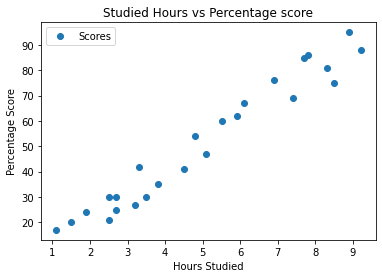

In [97]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style="o")  
plt.title('Studied Hours vs Percentage score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

 Information on the graph above shows a positive linear relationship between the number of hours studied and percentage score.

# Preparing the Data

In this step, we will divide the data into attribute and label. 
Firstly, we find which is the dependant variable. since the percentage score is dependent on the numbers of hours of study, then we will say the percentage score is dependent variable= y and Hours of sudy is the independent variable = x

In [101]:
x = data.iloc[:, :-1].values
y= data.iloc[:, 1]

We will be using the Scikit-Learn's feature selection to split the dataset into training and test sets.
we are training 80% of our dataset and testing 20%.


In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

 since our data has been splitted into training and testing sets, then we can train our Algorithm

In [104]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

print("Done")

Done


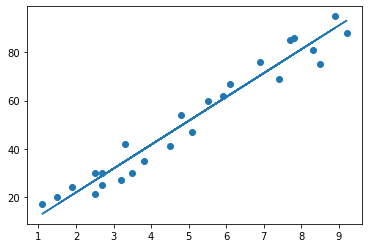

In [107]:
# To Plot the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Making Predictions

Since we have trained our algorithm, then, we can go ahead for predictions.

In [120]:
# To test data -in Hour
print(x_test)
y_pred = reg.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [122]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [123]:
data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


 To test for a given data, for example, 
 The number of hour = 10 predict score.

In [129]:
h=reg.predict([[10]])
h

array([101.12472485])

The above predicted that a student that studied for 10 hours will have a percent score of 101.1.

In [124]:
# To check the accuracy of our predictions
reg.score(x_test,y_test) #Output of 95%

0.9454906892105356

## To Evaluate the model 

To evaluate the performance of algorithm, which gives information on how well different algorithms perform on a particular dataset.

In [116]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
